# Analysis

##### Observed trend 1: Places at high latitudes are colder than places at low latitudes.

##### Observed trend 2: It doesn’t look like any direct relationship between latitude and humidity.  But apparently most of the cities are located in area with humidity over 60%.

##### Observed trend 3: There is no direct relationship between wind speed vs. latitude or cloudiness vs. latitude . 

In [24]:
# Dependencies
from citipy import citipy
from random import random
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import time

# Generate Cities List

In [25]:
#x= random.uniform(-80, 80)
#y = random.uniform(-180,180)
x, y = uniform(-80, 80), uniform(-180,180)
coordinates1 = []
def newpoint():
    return uniform(-80, 80), uniform(-180,180)
points = (newpoint() for i in list(range(1,601)))
for point in points:
    
    coordinates1.append(point)
    
coordinates1

[(-74.7199407056644, -104.07322172842393),
 (-38.555393814377595, -86.7552303366257),
 (-74.7211823751426, 82.42099838584608),
 (-19.22507559269384, -13.78326078993021),
 (25.986461544056567, 55.453313834782136),
 (-34.77547783270373, -109.87452536361863),
 (-64.22646632321495, -128.93834949135322),
 (-48.161797832517266, -128.58483780305392),
 (61.92384715029141, 108.88343225314247),
 (-36.89107610578734, -95.0618442473927),
 (-65.09785381338071, -171.93022748591395),
 (-46.925011963469565, -25.440683112512232),
 (-1.779684023125867, -20.805214456452376),
 (53.638643872897035, 89.22509872635953),
 (26.517874171067376, -21.50527722422001),
 (52.722523688187664, -3.3671812255295777),
 (-36.50238589281777, -20.743612209662672),
 (-5.235140006205512, 25.742514709519668),
 (38.86650533131038, 51.66413243935625),
 (73.26591834158128, 84.24651592129214),
 (-24.55510206748619, 125.48553697371813),
 (-70.16955105299874, -143.4314223116332),
 (52.360568418164945, 49.51265468055479),
 (34.768738

In [26]:
coordinates2 = []
def newpoint():
    return uniform(-80, 80), uniform(-180,180)
points = (newpoint() for i in list(range(1,601)))
for point in points:
    
    coordinates2.append(point)
    
coordinates2

[(-64.08074067184664, -67.13175050601424),
 (-14.753140431936174, -120.68424927198835),
 (-13.394574765502341, 161.93160144061198),
 (36.26014699656707, 177.05041079082332),
 (35.646202079182885, 27.734265822489363),
 (-23.163888173767724, 24.622891986851585),
 (-67.21834212783718, 12.000329154889954),
 (-77.25703887288057, 0.8755321297998933),
 (-11.62012884866897, 54.32949268865727),
 (53.279890457707154, 126.74150091912651),
 (-35.76638516037933, -80.2353810661632),
 (14.350788767263168, -78.8355814146423),
 (56.26054006258147, 136.89572637060343),
 (32.859768844697555, 150.910952612266),
 (23.97268949746575, -134.4604928957291),
 (26.51147334420189, 114.34988070111439),
 (-69.74565145473116, 82.02582525646505),
 (7.868719474573481, 99.50181914020737),
 (-58.47729189233844, 20.161906681753152),
 (70.41675728227949, -124.98197405792578),
 (54.46571231098932, -106.9605727117393),
 (-77.681856683987, -20.39963691262443),
 (-11.302895949350102, -136.00930429834926),
 (-72.3064034349741,

In [27]:
cities1 = []
for coordinate_pair in coordinates1:
    lat, lon = coordinate_pair
    city=citipy.nearest_city(lat, lon)
    cities1.append(citipy.nearest_city(lat, lon))
    
cities1

In [28]:
cities2 = []
for coordinate_pair in coordinates2:
    lat, lon = coordinate_pair
    city=citipy.nearest_city(lat, lon)
    cities2.append(citipy.nearest_city(lat, lon))
    
cities2

In [29]:

cities = cities1 + cities2
print(cities)
print(list(set(cities))) #one line for getting unique elements of cities
unique_cities=list(set(cities))
unique_cities

[<citipy.citipy.City object at 0x00000173A71902B0>, <citipy.citipy.City object at 0x00000173A718BE80>, <citipy.citipy.City object at 0x00000173A6EB2E48>, <citipy.citipy.City object at 0x00000173A86AD588>, <citipy.citipy.City object at 0x00000173A6E33E10>, <citipy.citipy.City object at 0x00000173A7F45048>, <citipy.citipy.City object at 0x00000173A7F45048>, <citipy.citipy.City object at 0x00000173A7F45048>, <citipy.citipy.City object at 0x00000173A8673208>, <citipy.citipy.City object at 0x00000173A718BE80>, <citipy.citipy.City object at 0x00000173A873E898>, <citipy.citipy.City object at 0x00000173A6FA0BA8>, <citipy.citipy.City object at 0x00000173A86AD4E0>, <citipy.citipy.City object at 0x00000173A8443C50>, <citipy.citipy.City object at 0x00000173A7498CC0>, <citipy.citipy.City object at 0x00000173A75C8358>, <citipy.citipy.City object at 0x00000173A708B780>, <citipy.citipy.City object at 0x00000173A7141BA8>, <citipy.citipy.City object at 0x00000173A6ECE588>, <citipy.citipy.City object at 

In [30]:
cities_name=[]
cities_country_code=[]
for city in unique_cities:
    country_code = city.country_code
    name = city.city_name
    cities_name.append(name)
    cities_country_code.append(country_code)
cities_name
len(cities_name)

561


# Perform API Calls

In [31]:
# Create a settings object with your API key and preferred units
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"

settings = {"units": "metric", "appid": api_key}

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
for citynum, cityname in enumerate(cities_name, start=1):
    target_url = url + "appid=" + api_key + "&units=" + units + "&q=" + cityname
    print("Now retrieving city # " + str(citynum) + "---" + cityname)
    print(target_url)


Now retrieving city # 1---skalistyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=skalistyy
Now retrieving city # 2---kemijarvi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kemijarvi
Now retrieving city # 3---harper
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=harper
Now retrieving city # 4---aklavik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=aklavik
Now retrieving city # 5---hovd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hovd
Now retrieving city # 6---ranong
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ranong
Now retrieving city # 7---vila velha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vila v

In [32]:
# Get data for each city in cities_name list

weather_data = []
weather_data = [ow.get_current(city, **settings) for city in cities_name]
time.sleep(1)
weather_data[0]

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 61.04, 'lon': 30.13},
 'dt': 1509314701,
 'id': 505230,
 'main': {'grnd_level': 992.43,
  'humidity': 100,
  'pressure': 992.43,
  'sea_level': 995.39,
  'temp': 4.06,
  'temp_max': 4.06,
  'temp_min': 4.06},
 'name': 'Priozersk',
 'rain': {'3h': 1.2675},
 'sys': {'country': 'RU',
  'message': 0.004,
  'sunrise': 1509254447,
  'sunset': 1509285864},
 'weather': [{'description': 'light rain',
   'icon': '10n',
   'id': 500,
   'main': 'Rain'}],
 'wind': {'deg': 66.5014, 'speed': 3.67}}

In [190]:
weather_data[0].keys()

dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

In [235]:
# Create an "extracts" object to get the temperature, latitude,and longitude etc. in each city
summary = [ "coord.lat", "coord.lon","main.temp_max", "main.humidity","clouds.all", "wind.speed", "dt"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]

column_names = ["Latitude", "Longitude", "Max Temperature", "Humidity", "Cloudiness", "Wind Speed", "Date"]
weather_data_df = pd.DataFrame(data, index=cities_name, columns=column_names)
weather_data_df.head()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
skalistyy,61.04,30.13,4.06,100,92,3.67,1509314701
kemijarvi,66.67,27.42,-0.49,100,92,4.52,1509314702
harper,4.38,-7.72,26.71,100,64,2.52,1509314703
aklavik,68.22,-135.01,-2.00,86,75,1.00,1509310800
hovd,48.01,91.64,-6.69,64,8,1.67,1509314703


In [236]:
weather_data_df["County"]=cities_country_code
weather_data_df["City"]=weather_data_df.index
weather_data_df.head()


,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date,County,City
skalistyy,61.04,30.13,4.06,100,92,3.67,1509314701,ru,skalistyy
kemijarvi,66.67,27.42,-0.49,100,92,4.52,1509314702,fi,kemijarvi
harper,4.38,-7.72,26.71,100,64,2.52,1509314703,lr,harper
aklavik,68.22,-135.01,-2.00,86,75,1.00,1509310800,ca,aklavik
hovd,48.01,91.64,-6.69,64,8,1.67,1509314703,mn,hovd


In [237]:
weather_data_df.dropna() 
weather_data_df.head()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date,County,City
skalistyy,61.04,30.13,4.06,100,92,3.67,1509314701,ru,skalistyy
kemijarvi,66.67,27.42,-0.49,100,92,4.52,1509314702,fi,kemijarvi
harper,4.38,-7.72,26.71,100,64,2.52,1509314703,lr,harper
aklavik,68.22,-135.01,-2.00,86,75,1.00,1509310800,ca,aklavik
hovd,48.01,91.64,-6.69,64,8,1.67,1509314703,mn,hovd


In [243]:
weather_data_df.index = range(len(weather_data_df.index))
weather_data_df.head(
)

,City,County,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,skalistyy,ru,1509314701,61.04,30.13,4.06,100,92,3.67
1,kemijarvi,fi,1509314702,66.67,27.42,-0.49,100,92,4.52
2,harper,lr,1509314703,4.38,-7.72,26.71,100,64,2.52
3,aklavik,ca,1509310800,68.22,-135.01,-2.00,86,75,1.00
4,hovd,mn,1509314703,48.01,91.64,-6.69,64,8,1.67


In [244]:
weather_data_df = weather_data_df[['City', 'County', 'Date', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']]

weather_data_df.head()

,City,County,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,skalistyy,ru,1509314701,61.04,30.13,4.06,100,92,3.67
1,kemijarvi,fi,1509314702,66.67,27.42,-0.49,100,92,4.52
2,harper,lr,1509314703,4.38,-7.72,26.71,100,64,2.52
3,aklavik,ca,1509310800,68.22,-135.01,-2.00,86,75,1.00
4,hovd,mn,1509314703,48.01,91.64,-6.69,64,8,1.67


In [245]:
weather_data_df.count()

City               561
County             561
Date               561
Latitude           561
Longitude          561
Max Temperature    561
Humidity           561
Cloudiness         561
Wind Speed         561
dtype: int64

# Save the DataFrame as a csv

In [258]:
weather_data_df.to_csv("../Instructions/City_WeatherPy_data.csv", encoding="utf-8", index=False)

# Latitude vs Temperature Plot

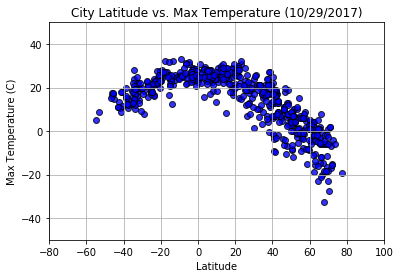

In [259]:
plt.scatter(weather_data_df["Latitude"], 
            weather_data_df["Max Temperature"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (10/29/2017)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-50, 50])

# Save the figure
plt.savefig("../Instructions/Temperature_to_Latitude.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

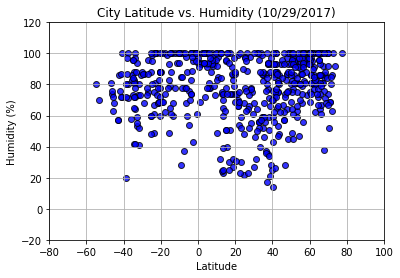

In [260]:
plt.scatter(weather_data_df["Latitude"], 
            weather_data_df["Humidity"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (10/29/2017)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("../Instructions/Humidity_to_Latitude.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

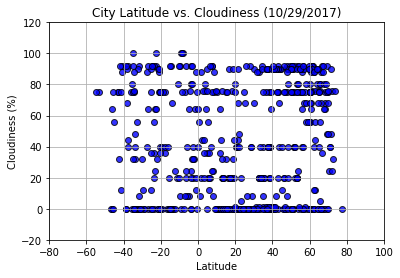

In [261]:
plt.scatter(weather_data_df["Latitude"], 
            weather_data_df["Cloudiness"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10/29/2017)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("../Instructions/Cloudiness_to_Latitude.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

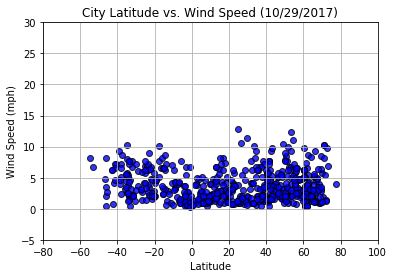

In [271]:
plt.scatter(weather_data_df["Latitude"], 
            weather_data_df["Wind Speed"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10/29/2017)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 30])

# Save the figure
plt.savefig("../Instructions/Wind_Speed_to_Latitude.png")

# Show plot
plt.show()

# Longitude vs Temperature Plot

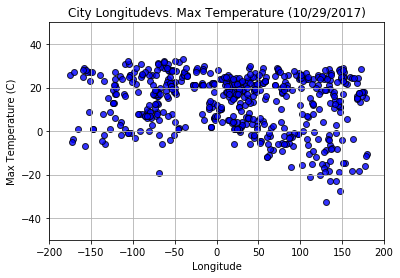

In [272]:
plt.scatter(weather_data_df["Longitude"], 
            weather_data_df["Max Temperature"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Longitudevs. Max Temperature (10/29/2017)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-50, 50])

# Save the figure
plt.savefig("../Instructions/Temperature_to_Longitude.png")

# Show plot
plt.show()

# Longitude vs. Humidity Plot

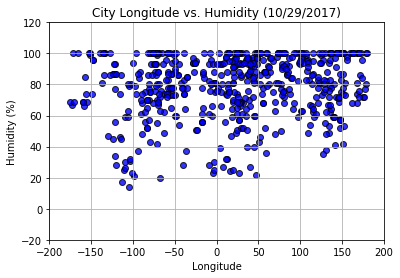

In [274]:
plt.scatter(weather_data_df["Longitude"], 
            weather_data_df["Humidity"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Longitude vs. Humidity (10/29/2017)")
plt.ylabel("Humidity (%)")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("../Instructions/Humidity_to_Longitude.png")

# Show plot
plt.show()

# Longitude vs. Cloudiness Plot

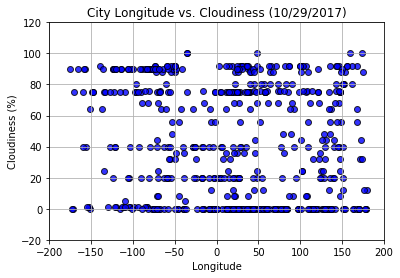

In [275]:
plt.scatter(weather_data_df["Longitude"], 
            weather_data_df["Cloudiness"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Longitude vs. Cloudiness (10/29/2017)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("../Instructions/Cloudiness_to_Longitude.png")

# Show plot
plt.show()

# Longitude vs. Wind Speed Plot

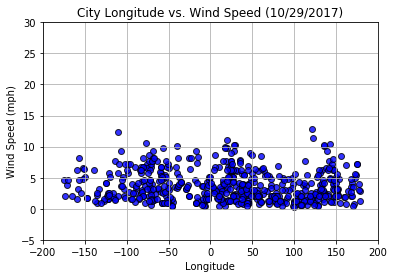

In [276]:
plt.scatter(weather_data_df["Longitude"], 
            weather_data_df["Wind Speed"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Longitude vs. Wind Speed (10/29/2017)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-5, 30])

# Save the figure
plt.savefig("../Instructions/Wind_Speed_to_Longitude.png")

# Show plot
plt.show()